# <h1><center>TP3</center></h1>

Nous travaillons sur la base de données <strong>diabetes</strong> de python. La base initiale comporte n = 442
patients et p=10 covariables. La variable Y à expliquer est un score correspondant à l’évolution de la
maladie. 
Pour s’amuser, un robot malicieux a contaminé le jeu de données en y ajoutant 200 variables
explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti notre jeu de données, il a volontairement
mélangé les variables entre elle de façon aléatoire. Bien entendu le robot a ensuite pris soin
d’effacer toute trace de son acte crapuleux si bien que nous ne connaissons pas les variables pertinentes.
La nouvelle base de données comporte <strong><i>n = 442</i></strong> patients et <strong><i>p = 210</i></strong> covariables, notés <strong>X</strong>.

Saurez-vous déjouer les plans de ce robot farceur et retrouver les variables pertinentes ?
<p> </p> 
                
<center><img src="https://media.giphy.com/media/xTiIzL6KVWyWJzDXy0/giphy.gif"></center>


In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import sklearn as sk
from scipy.stats import norm

seed = 1

## Question 1.

Importer la base de données <i>data_dm3.csv</i> disponible depuis le lien <i>https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv</i>. La dernière colonne est la variable à expliquer.Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives et le nombre d’observations.

In [3]:
data = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", sep = ",", header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
5,1.513286,0.072830,1.243039,-0.368609,-0.564998,-1.736720,-0.441544,-1.395122,-1.550146,0.941235,...,0.767162,0.417754,-1.010548,1.397951,0.074975,1.381528,-1.367316,1.200057,-0.292088,97.0
6,-0.501760,0.191544,-0.225878,-0.240506,1.350852,-1.253936,1.319458,2.007870,0.423578,0.417597,...,0.382681,-0.146417,-0.529950,-0.568923,0.340738,-1.312723,-0.366522,-0.347242,1.055200,138.0
7,-1.012528,-1.383290,0.686803,2.146420,1.255864,0.806962,0.137307,0.699977,-1.311624,-0.999770,...,-0.444868,-1.175901,0.481975,-0.329621,-1.712838,-0.047186,0.039768,-0.403074,0.249330,63.0
8,0.532639,1.691226,-0.008375,-1.478906,1.278352,-0.176214,-0.806066,0.515730,0.786887,-0.984347,...,0.183080,-0.194879,0.669917,-1.899072,0.122637,0.959231,-0.078359,-0.117192,1.664998,110.0
9,-0.537216,-0.128677,-0.815059,-1.273897,-0.985841,1.021629,-0.956690,1.009193,-0.030585,1.137275,...,-0.559667,-0.178620,1.130455,-1.158422,-0.376790,0.512715,-0.618469,1.463988,1.519603,310.0


In [4]:
print("Il y a " + str(data.shape[1] - 1) + " variables explicatives")
print("Il y a " + str(data.shape[0]) + " observations")

Il y a 210 variables explicatives
Il y a 442 observations


## Question 2.

Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ? 
Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres).

Commenter les graphiques obtenus.

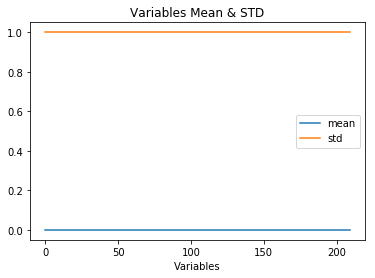

In [5]:
data_attributes = pd.DataFrame([data.describe().loc['mean', :209:], data.describe().loc['std', :209:]]) 

ax = data_attributes.T.plot()


ax.set_xlabel("Variables")
ax.set_title("Variables Mean & STD")
plt.show()

Les variables (autres que la variable à expliquer) sont donc centrées - réduites. On remarquera que, numériquement, les moyennes et std ne sont pas tout à fait égales à 0 et 1, mais sont assez proches pour l'approximer (de l'ordre de E-20)

In [6]:
print(data.describe().iloc[[1,2],210])

mean    152.133484
std      77.093005
Name: 210, dtype: float64


La variable à expliquer n'est donc pas centrée réduite.

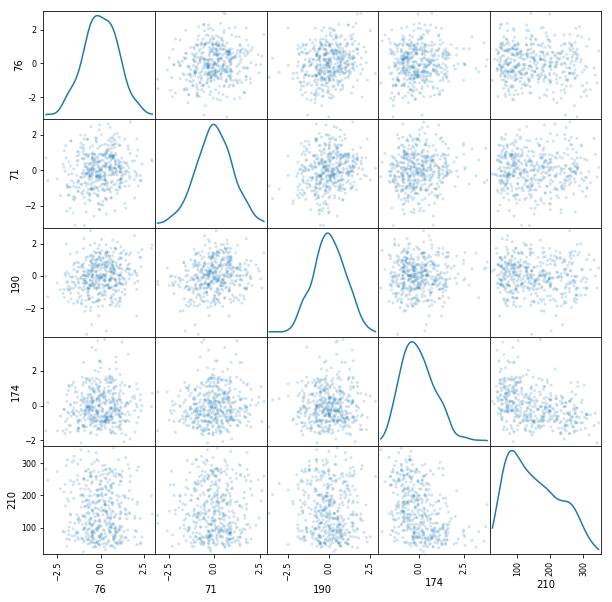

In [7]:
sample = rd.sample(range(0, 210), 4) + [210]

plot_df = data[sample]

pd.plotting.scatter_matrix(plot_df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

## Question 3.

Donner la matrix des correlations. Tracer le graphes de la décroissance des valeurs propres de la matrice de corrélation. Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans la suite.

In [8]:
data.corr().head(5)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,1.000000,-0.142086,-0.041896,-0.302272,0.138538,0.152145,-0.060964,-0.177809,0.006485,-0.052305,...,-0.058302,0.023301,0.032539,-0.058217,0.001804,-0.109111,-0.016684,0.164832,-0.051954,0.005017
1,-0.142086,1.000000,0.089454,-0.238143,-0.118706,-0.100456,0.147430,-0.121557,0.039698,-0.111136,...,-0.039701,-0.044379,-0.235257,-0.030673,0.077185,0.000847,-0.130910,-0.070838,0.063598,0.026596
2,-0.041896,0.089454,1.000000,-0.187086,0.140798,-0.073608,-0.077142,0.027821,-0.058874,-0.148022,...,0.000215,0.134172,0.038721,0.005670,0.088443,-0.030013,-0.325989,0.018941,-0.129928,0.071163
3,-0.302272,-0.238143,-0.187086,1.000000,0.011364,-0.073047,0.146828,-0.076386,0.074364,0.020403,...,0.025894,-0.120239,0.127989,-0.020208,-0.212420,0.084643,0.004350,-0.169209,-0.370631,0.029510
4,0.138538,-0.118706,0.140798,0.011364,1.000000,-0.022188,0.004966,0.182345,0.005433,0.122424,...,-0.009427,0.111639,-0.067095,-0.122180,-0.111999,0.043107,-0.024601,0.030615,-0.085896,0.037828


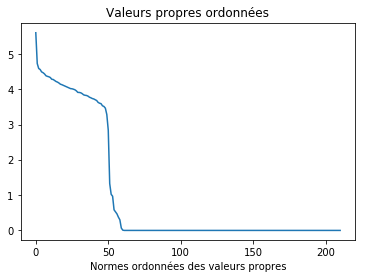

In [9]:
# Valeurs propres 
eig = np.absolute(np.linalg.eigvals(data.corr()))

eig_df = pd.Series(eig).sort_values(ascending = False).reset_index()


ax = eig_df[0].plot()
ax.set_xlabel("Normes ordonnées des valeurs propres")
ax.set_title("Valeurs propres ordonnées")
plt.show()

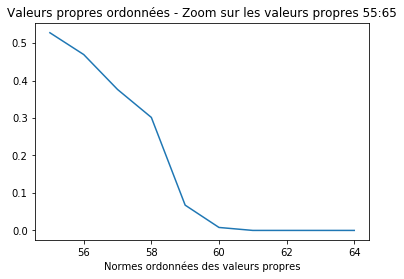

In [10]:
ax = eig_df[0].iloc[55:65].plot()
ax.set_xlabel("Normes ordonnées des valeurs propres")
ax.set_title("Valeurs propres ordonnées - Zoom sur les valeurs propres 55:65")
plt.show()

In [11]:
X = data.iloc[:, :210]
Y = data.iloc[:, 210]

## Question 4.

Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle, un pour tester le modèle. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles de chacun des 2 échantillons.

In [12]:
def split(X1, Y1, s) :
    import sklearn.model_selection as skms
    return skms.train_test_split(X1, Y1, test_size = 0.2, random_state = s)

X_train, X_test, Y_train, Y_test = split(X, Y, seed)

print("L'echantillion train a " + str(X_train.shape[0]) + " lignes")
print("L'echantillion train a " + str(X_test.shape[0]) + " lignes")

L'echantillion train a 353 lignes
L'echantillion train a 89 lignes


## Question 5.

Suivant les observations de la question (Q3), appliquer la méthode de "PCA before OLS" qui consiste à faire une ACP avant la régression. On tracera les valeurs des coefficients de régression calculés (sans l’intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrées classique

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 60)

X_PCA = pd.DataFrame(pca.fit_transform(X))
X_PCA.head(5)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,2.454462,0.777836,-2.377181,1.428619,2.205045,2.222814,-2.146990,2.201573,-1.041710,1.470918,...,0.853897,-1.671924,0.475453,0.012629,-0.601103,1.214567,0.059685,0.360025,-0.245810,-0.044733
1,-2.799616,0.858308,-0.903612,0.494824,-0.498521,-2.632864,-1.338735,-2.016459,-3.554427,0.029416,...,0.648746,1.428376,-0.311639,-1.221650,0.211165,0.620422,0.162146,0.106658,0.325350,0.043706
2,2.423940,-3.071772,3.298561,-1.670880,2.642850,-1.467652,1.801881,-0.755869,-3.479607,-0.826172,...,1.880303,-0.824578,0.709246,-0.380535,-1.034664,0.827812,-0.680627,0.836550,0.014744,-0.052905
3,0.918537,-0.451485,3.235455,-0.456654,2.108268,-0.918746,-0.252016,0.651743,1.433854,-2.555305,...,-0.466451,1.290386,-1.096100,0.846986,0.055698,-0.468442,0.297194,-0.441311,-0.079603,-0.080938
4,0.772420,-2.336857,1.417433,-2.776104,0.747695,-2.405090,1.382875,-0.326396,-2.047072,-0.974292,...,2.308009,1.491217,-0.865921,-0.286192,-0.211112,-0.169387,0.370393,-1.010706,-0.065872,-0.045235


### OLS After PCA 

In [14]:
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = split(X_PCA, Y, seed)

reg_PCA = sk.linear_model.LinearRegression(fit_intercept = True).fit(X_train_PCA, Y_train_PCA)

intercept_PCA = reg_PCA.intercept_
coeff_PCA = pd.Series(reg_PCA.coef_)
R2_PCA = reg_PCA.score(X_test_PCA,Y_test_PCA)

print("R2 = " + str(R2_PCA))

R2 = 0.2984760669257356


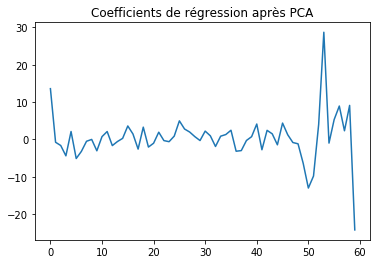

In [15]:
ax = coeff_PCA.plot()
ax.set_title('Coefficients de régression après PCA')
plt.show()

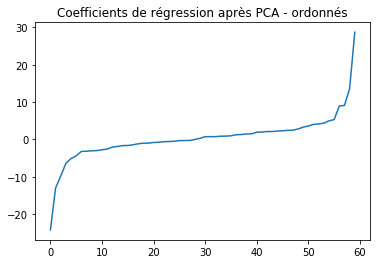

In [16]:
coeff_PCA_ordered = coeff_PCA.sort_values().reset_index()
ax = coeff_PCA_ordered[0].plot()
ax.set_title('Coefficients de régression après PCA - ordonnés')
plt.show()

### OLS Without PCA 

In [17]:
# OLS Without PCA
reg = sk.linear_model.LinearRegression(fit_intercept = True).fit(X_train, Y_train)

intercept = reg.intercept_
coeff = pd.Series(reg.coef_)
R2 = reg.score(X_test,Y_test)

print("R2 = " + str(R2))

R2 = 0.22550220258871756


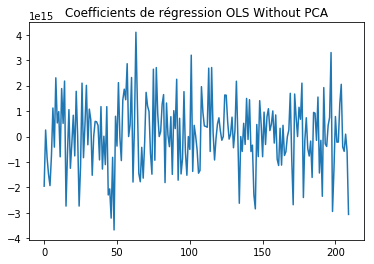

In [18]:
ax = coeff.plot()
ax.set_title('Coefficients de régression OLS Without PCA')
plt.show()

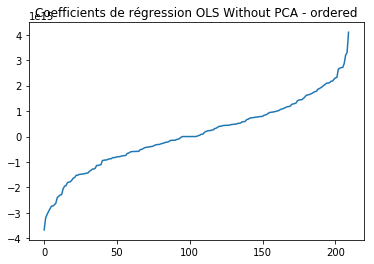

In [19]:
coeff_ordered = coeff.sort_values().reset_index()

ax = coeff_ordered[0].plot()
ax.set_title('Coefficients de régression OLS Without PCA - ordered')
plt.show()

## Question 6.

Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sut le train

In [20]:
pd.DataFrame([intercept, intercept_PCA], index = ['OLS without PCA', 'OLS after PCA'], columns = ['Intercept']).T

,OLS without PCA,OLS after PCA
Intercept,151.704896,150.583057


In [21]:
print("Moyenne Y sur train set : " + str(Y_train.mean()))

Moyenne Y sur train set : 153.37677053824362


A VOIR 

In [22]:
X_train_PCA_norm = (X_train_PCA - X_train_PCA.mean()) / X_train_PCA.std()

reg_norm = sk.linear_model.LinearRegression(fit_intercept = True).fit(X_train_PCA_norm, Y_train)

intercept_norm = reg_norm.intercept_
print("Intercept OLC After PCA, After normalization : " + str(intercept_norm))
print("Moyenne Y sur train set : " + str(Y_train.mean()))

Intercept OLC After PCA, After normalization : 153.37677053824362
Moyenne Y sur train set : 153.37677053824362


On a bien égalité entre les 2

## Question 7.

Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

In [23]:
Y_hat_OLS = intercept + X_test @ coeff
Y_hat_PCA = intercept_PCA + X_test_PCA @ coeff_PCA

res_OLS = pd.Series(Y_hat_OLS - Y_test).reset_index()
res_PCA = pd.Series(Y_hat_PCA - Y_test).reset_index()

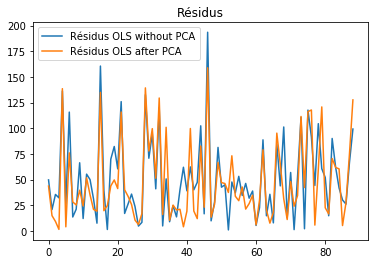

In [24]:
# Plot
Res = pd.DataFrame([res_OLS[0], res_PCA[0]], index = ["Résidus OLS without PCA", "Résidus OLS after PCA"])

np.abs(Res).T.plot().set_title('Résidus')

plt.show()

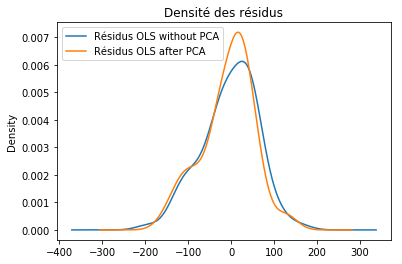

In [25]:
ax = Res.T.plot.kde()
ax.set_title('Densité des résidus')
plt.show()

In [26]:
pd.DataFrame([R2, R2_PCA], index = ['OLS without PCA', 'OLS after PCA'], columns = ['R2']).T

,OLS without PCA,OLS after PCA
R2,0.225502,0.298476


## Question 8

Appliquer la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Afficher l’ordre de séléction des variables.

In [33]:
X = data.iloc[:, :210]
X_forward = X.copy()
X_forward.insert(loc=0, column='intercept', value=pd.Series(np.ones(X.shape[0])))
X_forward.reset_index
ordered_X = pd.DataFrame()
indexes = []
sigma = np.std(Y)

for i in range(X.shape[1]) :
    model = sk.linear_model.LinearRegression(fit_intercept = False).fit(X_forward, Y)
    theta = model.coef_
    XtX_inv = pd.DataFrame(np.linalg.pinv(X_forward.T @ X_forward))
    Tmax = np.abs(np.sqrt(len(theta)) * theta[0] / (sigma * np.sqrt(XtX_inv.iloc[0,0])))
    jmax = 0
    for j in range(1, len(X_forward.columns)):
        T = np.abs(np.sqrt(len(theta)) * theta[j] / (sigma * np.sqrt(XtX_inv.iloc[j,j])))
        if T > Tmax :
            Tmax = T
            jmax = j
    ordered_X[i] = X_forward.iloc[:,jmax]
    indexes.append(X_forward.columns[jmax])
    X_forward = X_forward.drop(columns = X_forward.columns[jmax])

pd.DataFrame(indexes).T

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,59,107,139,2,122,132,50,46,96,100,...,126,156,188,55,60,7,86,39,82,70


(442, 210)
(442, 210)


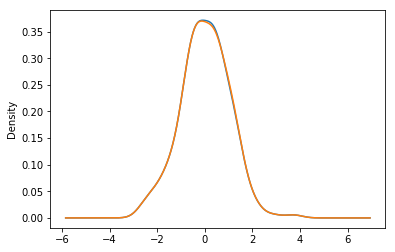

In [28]:
print(X.shape)
print(ordered_X.shape)

X.iloc[0, :].plot.kde()
ordered_X.iloc[0, :].plot.kde()
plt.show()

On vérifie que X et ordered_X ont même shape.
De plus, on vérifie graphiquement que les lignes de X et de ordered_X (après forward selection) ont même densité graphiquement (les courbes sont superposées)

--> il n'y a pas eu de perte d'information et toutes les colonnes de X se retrouvent dans X_forward

## Question 9.

Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant
    (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) ,
    (ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1.
    Enfin on donnera la liste des variables sélectionné

In [29]:
X = data.iloc[:, :210]
X_forward = X.copy()
X_forward.insert(loc=0, column='intercept', value=pd.Series(np.ones(X.shape[0])))
X_forward.reset_index
ordered_X = pd.DataFrame()
stats_plot = pd.DataFrame()
sigma = np.std(Y)

for i in range(3) :
    model = sk.linear_model.LinearRegression(fit_intercept = False).fit(X_forward, Y)
    theta = model.coef_
    XtX_inv = pd.DataFrame(np.linalg.pinv(X_forward.T @ X_forward))
    Tmax = np.abs(np.sqrt(len(theta)) * theta[0] / (sigma * np.sqrt(XtX_inv.iloc[0,0])))
    jmax = 0
    T_list = []
    for j in range(len(X_forward.columns)):
        T = np.abs(np.sqrt(len(theta)) * theta[j] / (sigma * np.sqrt(XtX_inv.iloc[j,j])))
        T_list.append(T)
        if np.abs(T) > Tmax :
            Tmax = np.abs(T)
            jmax = j
    ordered_X[i] = X_forward.iloc[:,jmax]
    X_forward = X_forward.drop(columns = X_forward.columns[jmax])
    stats_plot[i] = pd.Series(T_list)
    

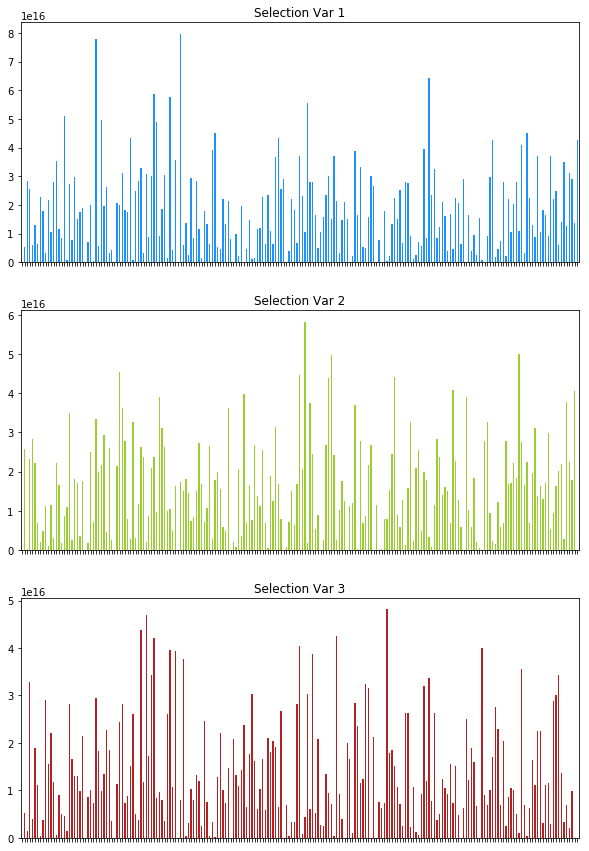

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

stats_plot[0].plot.bar(ax=axes[0], color='dodgerblue', title = 'Selection Var 1').set_xticklabels([])
stats_plot[1].plot.bar(ax=axes[1], color='yellowgreen', title = 'Selection Var 2').set_xticklabels([])
stats_plot[2].plot.bar(ax=axes[2], color='firebrick', title = 'Selection Var 3').set_xticklabels([])

plt.show()

In [31]:
X = data.iloc[:, :210]
X_forward = X.copy()
X_forward.insert(loc=0, column='intercept', value=pd.Series(np.ones(X.shape[0])))
X_forward.reset_index
ordered_X = pd.DataFrame()
p_plot = []
sigma = np.std(Y)

for i in range(X.shape[1]) :
    model = sk.linear_model.LinearRegression(fit_intercept = True).fit(X_forward, Y)
    theta = model.coef_
    XtX_inv = pd.DataFrame(np.linalg.pinv(X_forward.T @ X_forward))
    Tmax = np.sqrt(len(theta)) * theta[0] / (sigma * np.sqrt(XtX_inv.iloc[0,0]))
    jmax = 0
    for j in range(len(X_forward.columns)):
        T = np.sqrt(len(theta)) * theta[j] / (sigma * np.sqrt(XtX_inv.iloc[j,j]))
        if np.abs(T) > Tmax :
            Tmax = np.abs(T)
            jmax = j
    ordered_X[i] = X_forward.iloc[:,jmax]
    p_plot.append(Tmax)
    X_forward = X_forward.drop(columns = X_forward.columns[jmax])

p_plot = pd.DataFrame(p_plot)
p_plot.T

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,6.470831e+16,7.896745e+16,7.366445e+16,7.378086e+16,6.377182e+16,4.500734e+16,8.251812e+16,5.105117e+16,5.623422e+16,5.838083e+16,...,1.085521,0.961113,0.833506,0.827754,0.543042,0.534065,0.099611,0.04372,0.010754,0.00401


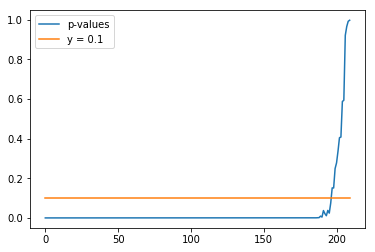

In [32]:
p_values = pd.DataFrame(2 * (1 - (norm.cdf(p_plot))))
p_values[1] = pd.Series([0.1]*X.shape[1])
p_values.columns = ['p-values', 'y = 0.1']
p_values.plot()

plt.show()

In [33]:
Y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
5       97.0
6      138.0
7       63.0
8      110.0
9      310.0
10     101.0
11      69.0
12     179.0
13     185.0
14     118.0
15     171.0
16     166.0
17     144.0
18      97.0
19     168.0
20      68.0
21      49.0
22      68.0
23     245.0
24     184.0
25     202.0
26     137.0
27      85.0
28     131.0
29     283.0
       ...  
412    261.0
413    113.0
414    131.0
415    174.0
416    257.0
417     55.0
418     84.0
419     42.0
420    146.0
421    212.0
422    233.0
423     91.0
424    111.0
425    152.0
426    120.0
427     67.0
428    310.0
429     94.0
430    183.0
431     66.0
432    173.0
433     72.0
434     49.0
435     64.0
436     48.0
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: 210, Length: 442, dtype: float64